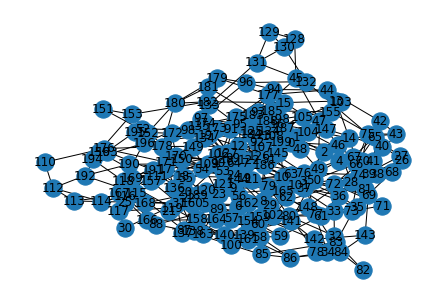

In [1]:
import networkx as nx 
import torch_geometric.utils as U
import torch 

n = 200
G = nx.connected_watts_strogatz_graph(n, k=4, p=0.4)
nx.draw(G, with_labels=True)
G0 = U.from_networkx(G)
edge_index = G0.edge_index
G0.x = torch.randn(n,3) # feature_size = 3
x = G0.x

In [3]:
from pooling_class import *
pooling_layer = pool1 = pooling(in_channels = x.shape[1], score_method=2, normalize=True, self_add=0.5, aggregate_score_method='avg', upper_bound=8, greedy=True, select=True)
new_edge_index, new_x, selected_assignment_matrix, selected_node_score_matrix, edge_index = pool1(x,edge_index)
selected_assignment_matrix.shape

torch.Size([53, 200])

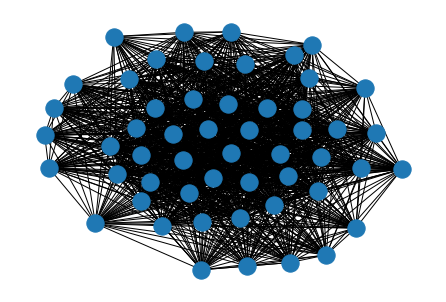

In [4]:
from torch_geometric.data import Data
data = Data(x=new_x, edge_index=new_edge_index)
G_new = U.to_networkx(data, to_undirected=True)
nx.draw(G_new)